In [ ]:
# Step 1: Import Packages

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Step 2: Import Using Zip Extractor

import zipfile

zf = zipfile.ZipFile("us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
# Step 3: Choose 3 variables you think are important, case_status is your target variable

df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [28]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [31]:
df_select = df[["case_status", "class_of_admission", "application_type"]]
df_select.columns

Index(['case_status', 'class_of_admission', 'application_type'], dtype='object')

In [32]:
# Step 4: Clean your data for Decision Tree

X = pd.get_dummies(df_select, "class_of_admission")
y = df["case_status"]

In [33]:
df_select.isnull().sum()

case_status                0
class_of_admission     22845
application_type      239093
dtype: int64

In [34]:
final = df_select.dropna()

In [35]:
final.isnull().sum()

case_status           0
class_of_admission    0
application_type      0
dtype: int64

In [36]:
# Step 5: Fit & Plot a Decision Tree at Depth 3

clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'class_of_admission_Certified <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.5, 0.625, 'class_of_admission_Certified-Expired <= 0.5\ngini = 0.377\nsamples = 192429\nvalue = [0, 148586, 25649, 18194]'),
 Text(0.3333333333333333, 0.375, 'class_of_admission_Denied <= 0.5\ngini = 0.486\nsamples = 43843\nvalue = [0, 0, 25649, 18194]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 18194\nvalue = [0, 0, 0, 18194]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 25649\nvalue = [0, 0, 25649, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 148586\nvalue = [0, 148586, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 181933\nvalue = [181933, 0, 0, 0]')]

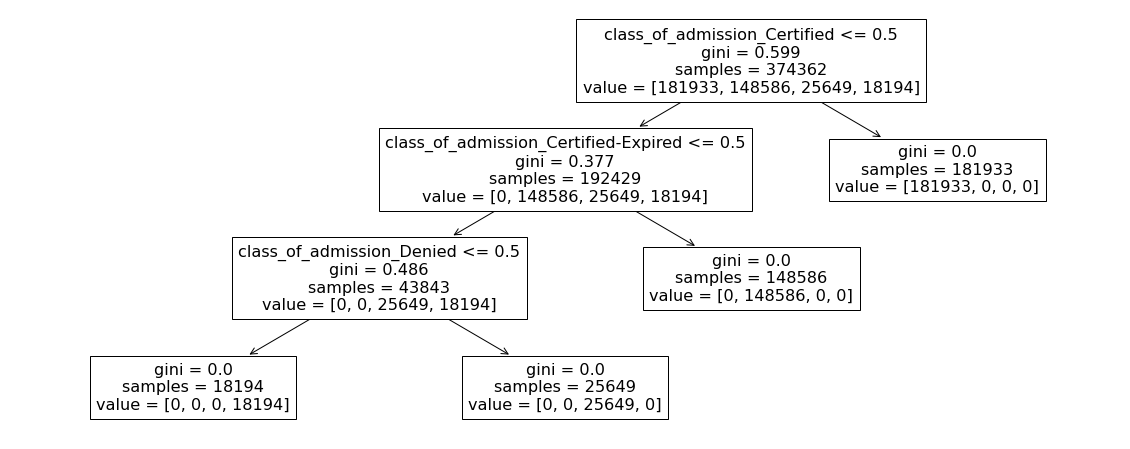

In [37]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns )

In [38]:
# Step 6: Interpret

**Analysis: The class of admission who are certified have a gini coefficient of 0.599 (leaning towards inequal), and contain a sample size of 374,362. Those who have a certification that was expired was 192,429 with a lower gini coefficient!**

In [39]:
# Step 7: Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

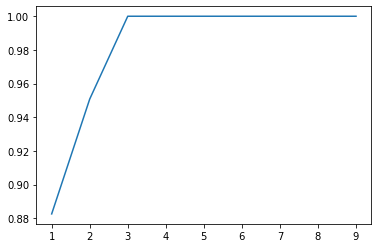

In [40]:
depth = []

for i in range(1,10):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    score = tree.score(X_test, y_test)
    depth.append(score)


plt.plot(range(1,10), depth)